In [9]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as color
better_magma = color.magma
better_magma.set_bad('black',1.)
import matplotlib.colors as c

import config_um
import config_um_wcc

from psd_utils import PSDUtils

from utils import save_pickle

# fuck logging
import logging
psd_log = logging.getLogger('__psd_utils__')
psd_log.disabled = True

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
cfg_um = config_um.load_config_values('unitless')
cfg_um_wcc = config_um_wcc.load_config_values('unitless')

path_um = config_um.get_data_path()
path_um_wcc = config_um_wcc.get_data_path() + '/'

In [5]:
dim = 4096
opd_maps = {}

In [6]:
diam_m1 = cfg_um['telescope']['optics']['m1']['aper_clear_OD']
dx_m1 = diam_m1 / dim

coords = PSDUtils.coord_arrays(dims=(dim, dim), dx=dx_m1)
psd = PSDUtils.abc_psd(coords=coords, a=1, b=0.1, c=2.8, rms=18.8, rms_scaling=True)
map = PSDUtils.create_map(coords, psd, rms=18.8, seed=727)

opd_maps.update({'m1' : {'dx'  : dx_m1,
                         'map' : map.map}})

diam_m2 = cfg_um['telescope']['optics']['m2']['aper_clear_OD']
dx_m2 = diam_m2 / dim

coords = PSDUtils.coord_arrays(dims=(dim, dim), dx=dx_m2)
psd = PSDUtils.abc_psd(coords=coords, a=1, b=10, c=2.65, rms=16, rms_scaling=True)
map = PSDUtils.create_map(coords, psd, rms=16, seed=1 + 727)

opd_maps.update({'m2' : {'dx'  : dx_m2,
                         'map' : map.map}})

diam_m3 = cfg_um['telescope']['optics']['m3']['aper_clear_w']
dx_m3 = diam_m3 / dim

coords = PSDUtils.coord_arrays(dims=(dim, dim), dx=dx_m3)
psd = PSDUtils.abc_psd(coords=coords, a=1, b=10, c=2.65, rms=10, rms_scaling=True)
map = PSDUtils.create_map(coords, psd, rms=10, seed=2 + 727)

opd_maps.update({'m3' : {'dx'  : dx_m3,
                         'map' : map.map}})

diam_m4 = cfg_um['telescope']['optics']['m4']['aper_clear_OD']
dx_m4 = diam_m4 / dim

coords = PSDUtils.coord_arrays(dims=(dim, dim), dx=dx_m4)
psd = PSDUtils.abc_psd(coords=coords, a=1, b=10, c=2.65, rms=10, rms_scaling=True)
map = PSDUtils.create_map(coords, psd, rms=10, seed=3 + 727)

opd_maps.update({'m4' : {'dx'  : dx_m4,
                         'map' : map.map}})

PSD now scaled to RMS.
PSD now scaled to RMS.
PSD now scaled to RMS.
PSD now scaled to RMS.


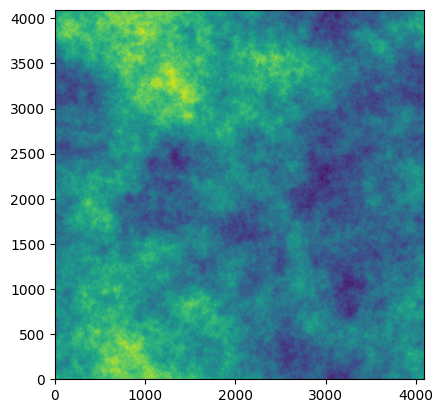

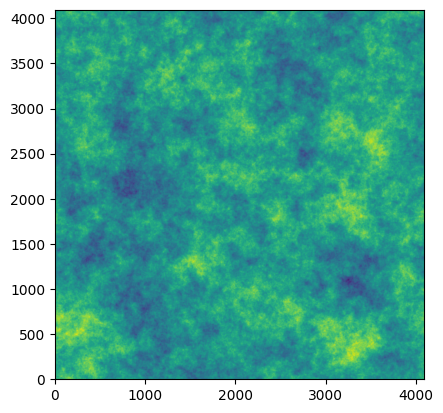

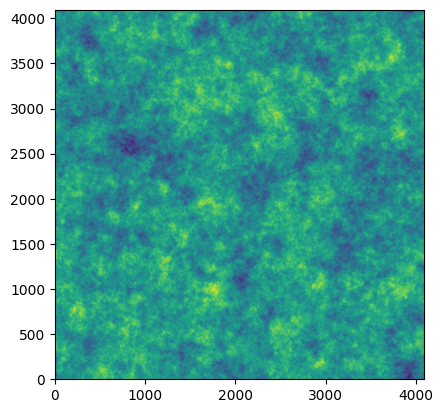

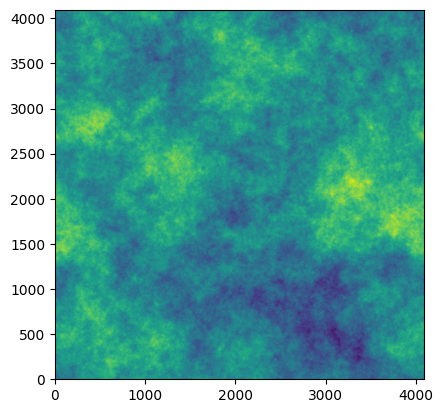

In [7]:
for key in opd_maps:
    plt.figure()
    plt.imshow(opd_maps[key]['map'])

In [10]:
save_pickle('/home/derbyk/src/ffpr/data/opd_maps.pkl', data=opd_maps)

Saved data to:  /home/derbyk/src/ffpr/data/opd_maps.pkl
